<a href="https://colab.research.google.com/github/btknzn/TiagoRobotSkillLearning/blob/main/encodertransformers_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import os
import torch
import torchvision
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset
from torch import nn
#df = pd.read_csv('PlacingBack/data.csv')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import torchvision.datasets as dset
from torchvision.io import read_image
import cv2
from sklearn.preprocessing import Normalizer
import torchvision.transforms.functional as TF
def read_image_dir(image_folder):
    image_folder  = image_folder
    lst = os.listdir(image_folder) # your directory path
    number_files = len(lst)
    images = []
    for i in range(1,number_files):
        folder = image_folder+"/label"+str(i)+".jpg"
        img = cv2.imread(folder)
        img.resize([img.shape[2],img.shape[0],img.shape[1]])
        images.append(img)
    return images

def read_image_dir_b(image_folder):
    image_folder  = image_folder
    lst = os.listdir(image_folder) # your directory path
    number_files = len(lst)
    images = []
    for i in range(1,number_files):
        folder = image_folder+"/label"+str(i)+".jpg"
        img = cv2.imread(folder,0)
        img.resize(1,img.shape[0],img.shape[1])
        img = img
        images.append(img)
    return images

class MyDataset(Dataset):
 
  def __init__(self,file_name,image_folder_normal,image_folder_depth):
    df=pd.read_csv(file_name)
    self.image_folder_norma = image_folder_normal
    image = read_image_dir(image_folder_normal)
    image = torch.asarray(image).float()
    #correct it for complex situation
    R_means = 188.3424
    R_std = 54.67417
    G_means = 177.37274
    G_std = 66.43382
    B_means = 169.08133
    B_std = 72.04574
    normalized_image = TF.normalize(image,[R_means, G_means, B_means], [R_std, G_std, B_std])
    image = torch.asarray(normalized_image).float()
    imageDs = read_image_dir_b(image_folder_depth)
    D_std =  1.165845
    D_means = 1.2093502
    imageDs = torch.asarray(imageDs).float()
    normalized_disparity = TF.normalize(imageDs,[D_means], [D_std])
    imageDs = torch.asarray(normalized_disparity).float()

    X1_MIN = 0.04995837
    X1_MAX = 0.7562845
    arm_joint1 = (df.arm_joint1-X1_MIN)/(X1_MAX-X1_MIN)
    X2_MIN = -0.43724102
    X2_MAX = 1.0187681
    arm_joint2 = (df.arm_joint2-X2_MIN)/(X2_MAX-X2_MIN)
    X3_MIN = -3.0051005
    X3_MAX = -0.7699633
    arm_joint3 = (df.arm_joint3-X3_MIN)/(X3_MAX-X3_MIN)

    X4_MIN = 0.5167487
    X4_MAX = 2.0607007
    arm_joint4 = (df.arm_joint4-X4_MIN)/(X4_MAX-X4_MIN)
    X5_MIN = -2.0750659
    X5_MAX = 2.0743227
    arm_joint5 = (df.arm_joint5-X5_MIN)/(X5_MAX-X5_MIN)

    X6_MIN = -1.3956555
    X6_MAX = 1.3958309
    arm_joint6 = (df.arm_joint6-X6_MIN)/(X6_MAX-X6_MIN)
    
    X8_MIN = 0.022458013
    X8_MAX = 0.045057185
    gripper_joint1 = (df.gripper_joint1-X8_MIN)/(X8_MAX-X8_MIN)

    X9_MIN = 0.022458013
    X9_MAX = 0.045057185
    gripper_joint2 = (df.gripper_joint2-X9_MIN)/(X9_MAX-X9_MIN)

    X7_MIN = -1.8210393
    X7_MAX = 2.0740623
    arm_joint7= (df.arm_joint7-X7_MIN)/(X7_MAX-X7_MIN)


    X10_MIN = -2.1165963e-06
    X10_MAX = 0.3500109
    torso_joint = (df.torso_joint-X10_MIN)/(X10_MAX-X10_MIN)

    X11_MIN = -0.00033559513
    X11_MAX = 0.0006243193
    torsohead_joint1 = (df.torso_head1-X11_MIN)/(X11_MAX-X11_MIN)

    X12_MIN = -0.7685144
    X12_MAX = 0.0014590342  
    torsohead_joint2 = (df.torso_head2-X12_MIN)/(X12_MAX-X12_MIN)

   

   
   


    

    #1 Feature Number
    self.arm_joint1 = arm_joint1.values
    #self.arm_joint1 = df.arm_joint1.values
    #2 Feature Number
    self.arm_joint2 = arm_joint2.values
    #self.arm_joint2 = df.arm_joint2.values
    #3 Feature Number
    self.arm_joint3 = arm_joint3.values
    #self.arm_joint3 = df.arm_joint3.values
    #4 Feature Number
    self.arm_joint4 = arm_joint4.values
    #self.arm_joint4 = df.arm_joint4.values
    #5 Feature Number
    self.arm_joint5 = arm_joint5.values
    #self.arm_joint5 = df.arm_joint5.values
    #6 Feature Number
    self.arm_joint6 = arm_joint6.values
    #self.arm_joint6 = df.arm_joint6.values
    #7 Feature Number
    self.arm_joint7 = arm_joint7.values
    #self.arm_joint7 = df.arm_joint7.values
    #8 Feature Number
    self.gripper_joint1 = gripper_joint1.values
    #self.gripper_joint1 = df.gripper_joint1.values
    #9 Feature Number
    self.gripper_joint2 = gripper_joint2.values
    #self.gripper_joint2 = df.gripper_joint2.values
    #10 Feature Number
    self.torso_joint = torso_joint.values
    #self.torso_joint = df.torso_joint.values
    #11 Feature Number
    self.torsohead_joint1 = torsohead_joint1.values
    #self.torsohead_joint1 = df.torso_head1.values
    #12 Feature Number
    self.torsohead_joint2 = torsohead_joint2.values
    #self.torsohead_joint2 = df.torso_head2.values

    self.image = image
    #self.image = read_image_dir(image_folder_normal)
    #self.image =  torch.asarray(self.image).float()
    self.imageDs = imageDs
    #self.imageDs = read_image_dir_b(image_folder_depth)
    #self.imageDs = torch.asarray(self.imageDs).float()


  def __len__(self):
    return min(self.image.shape[0],self.imageDs.shape[0],self.arm_joint6.shape[0],self.torso_joint[0],self.torsohead_joint1[0])-1
   
  def __getitem__(self,idx):
    currentRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
    if idx >= len(self.arm_joint1)-2:   
      nextActionRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
      x = torch.Tensor(currentRobot)
      x = x.reshape((1,x.shape[0]))
      image_current = self.image[idx]
      image_next = self.image[idx]
      depth_current = self.imageDs[idx]
      depth_next = self.imageDs[idx]
      y = torch.Tensor(nextActionRobot)
      y = y.reshape((1,y.shape[0]))
      return x,y,image_current,image_next,depth_current,depth_next

    else:
      image_current = self.image[idx] 
      depth_current = self.imageDs[idx]
      idx = idx+1
      nextActionRobot = [self.arm_joint1[idx],self.arm_joint2[idx],self.arm_joint3[idx],self.arm_joint4[idx],self.arm_joint5[idx],self.arm_joint6[idx],self.arm_joint7[idx],self.gripper_joint1[idx],self.gripper_joint2[idx],self.torso_joint[idx],self.torsohead_joint1[idx],self.torsohead_joint2[idx]]
      x = torch.Tensor(currentRobot)
      x = x.reshape((1,x.shape[0]))
      y = torch.Tensor(nextActionRobot)
      y = y.reshape((1,y.shape[0]))
      image_next = self.image[idx]
      depth_next = self.imageDs[idx]
      return x,y,image_current,image_next,depth_current,depth_next


    

In [ ]:
import pandas as pd
import os
import torch
import torchvision
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as dset
from torch import nn
#df = pd.read_csv('PlacingBack/data.csv')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pds
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader,IterableDataset
import torchvision.datasets as dset
from torchvision.io import read_image
import cv2
from sklearn.preprocessing import Normalizer



class DatasetItar(IterableDataset):
  def __init__(self,file_name,image_folder_normal,image_folder_depth):
    self.data = MyDataset(file_name,image_folder_normal,image_folder_depth)
  def __iter__(self):
        return iter(self.data)


    

In [ ]:
class autoencoderBLACK(nn.Module):
    def __init__(self):
        super(autoencoderBLACK, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Conv2d(8,16,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Conv2d(16,32,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(32,16,kernel_size=5,stride=2),
            nn.ReLU(),
            ) 
        
        self.decoder = nn.Sequential(
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,32,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.ConvTranspose2d(32,16,kernel_size=5,stride=2),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.ConvTranspose2d(16,8,kernel_size=5,stride=2,output_padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.ConvTranspose2d(8,1,kernel_size=5,stride=2,output_padding=1),
            nn.Sigmoid(),
            nn.BatchNorm2d(1)
            )    
    
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
autoencoderBLACK = autoencoderBLACK()

autoencoderBLACK.load_state_dict(torch.load("/content/drive/MyDrive/datasets/AEBLACK.pth"))


<All keys matched successfully>

In [ ]:

from matplotlib import pyplot as plt
import numpy as np
import  torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as dset
from torchvision.utils import save_image
import torchvision.utils as vutils
from torchsummary import summary
from IPython import display
import torchvision.models as models
from torchvision import datasets, models, transforms
from matplotlib import pyplot as plt
import numpy as np

from matplotlib import pyplot as plt
import numpy as np

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as dset
from torchvision.utils import save_image
import torchvision.utils as vutils
from torchsummary import summary
from torch.utils.data.sampler import SubsetRandomSampler

import transformers
#from transformers import TransformerEncoder, TransformerDecoder
encoder_resnet = torchvision.models.resnet50(pretrained=True)
class TransformerPredictor(nn.Module):
    def __init__(self, n_hidden=1024, future=0):
        super(TransformerPredictor, self).__init__()
        self.n_hidden = n_hidden
        self.future = future
        self.max_seq_len = 2300  # maximum sequence length
        self.d_model = 2300  # hidden size
        self.encoder = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(self.d_model, 4, self.d_model),
            num_layers=6,
            norm=nn.LayerNorm(self.d_model)
        )
        self.decoder = nn.TransformerDecoder(
            nn.TransformerDecoderLayer(self.d_model, 4, self.d_model),
            num_layers=6,
            norm=nn.LayerNorm(self.d_model)
        )
        self.linear = nn.Linear(self.d_model, 12)
        
        self.encoder_RGB= torch.nn.Sequential(*(list(encoder_resnet.children())[:-1]))
        self.encoder_D = autoencoderBLACK.encoder


    def forward(self, x, image_current, depth_current):
        # Encode the image and depth data
        latent_RGB = self.encoder_RGB(image_current)
        latent_D = self.encoder_D(depth_current)
        # Flatten the data and concatenate them
        flatten_x = x.flatten(start_dim=1)
        flatten_RGB = latent_RGB.flatten(start_dim=1)
        flatten_D = latent_D.flatten(start_dim=1)
        concat_input = torch.cat((flatten_x, flatten_RGB, flatten_D), dim=1)
        # Encode the concatenated input
        pos_encoder_input = concat_input
        encoded_input = self.encoder(pos_encoder_input)
        # Decode the encoded input
        decoded_output = self.decoder(encoded_input, encoded_input)
        # Flatten the decoded output and apply the linear layer
        flatten_output = decoded_output.flatten(start_dim=1)
        output = self.linear(flatten_output)
        # Return the output
        return output

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
datasets_partial = []
data_folder = '/content/drive/MyDrive/datasets'
lst = os.listdir(data_folder)
number_files = len(lst)
completeMotionFolder = []
for i in range(0,number_files):
  folderCompleteMotion = str(i+1)
  if  folderCompleteMotion in lst:
    completeMotionFolder.append(data_folder+"/"+folderCompleteMotion)
          
      
datasets = []            
for i in range(0,len(completeMotionFolder)):
  folder = completeMotionFolder[i]
  lst = os.listdir(folder)
  zeroCSV = folder +"/0.csv"
  depthZERO = folder+'/depth/0'
  imageZERO = folder + '/Image/0'
  dataset = [zeroCSV,imageZERO,depthZERO] 
  datasets.append(dataset)

train_loaders = []
for i in range(0,len(datasets)):
  CSV = datasets[i][0]
  depth = datasets[i][1]
  image = datasets[i][2]
  dataset = DatasetItar(CSV,depth,image)
  train_loader = DataLoader(dataset,shuffle=False,batch_size=32)
  train_loaders.append(train_loader) 

<ipython-input-2-f82e967b5693>:53: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:230.)
  image = torch.asarray(image).float()


In [ ]:
device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
model = TransformerPredictor().to(device)
criterion = nn.MSELoss()
learning_rate = 1e-4
weight_decay = 1e-7

In [ ]:
n_epoch = 1000
model.encoder_D.requires_grad_ = True
model.encoder_RGB.requires_grad_=True
learning_rate = 1e-4
weight_decay = 1e-7
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
for epoch in range(0,n_epoch):
  currentLoss = []
  for j in range(0,len(train_loaders)):
    train_loader = train_loaders[j]
    for data in (train_loader):
      x = data[0][:,:,:].to(device)
      x_next = data[1][:,:,:].to(device)
      image_current = data[2].to(device)
      image_next = data[3].to(device)
      depth_current = data[4].to(device)
      depth_next = data[5].to(device)
      train_input = x
      train_target = x_next
      optimizer.zero_grad()
      out = model(train_input,image_current,depth_current)
      loss = criterion(out,train_target)
      loss.backward()
      optimizer.step()
      currentLoss.append(loss)
  print(str(epoch)+".epochnumber"+ "loss:", sum(currentLoss)/len(currentLoss))



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32, 1, 12])) that is different to the input size (torch.Size([32, 12])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([4, 1, 12])) that is different to the input size (torch.Size([4, 12])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([17, 1, 12])) that is different to the input size (torch.Size([17, 12])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  retur

0.epochnumberloss: tensor(0.0922, device='cuda:0', grad_fn=<DivBackward0>)
1.epochnumberloss: tensor(0.0911, device='cuda:0', grad_fn=<DivBackward0>)
2.epochnumberloss: tensor(0.0909, device='cuda:0', grad_fn=<DivBackward0>)
3.epochnumberloss: tensor(0.0915, device='cuda:0', grad_fn=<DivBackward0>)
4.epochnumberloss: tensor(0.0882, device='cuda:0', grad_fn=<DivBackward0>)
5.epochnumberloss: tensor(0.0863, device='cuda:0', grad_fn=<DivBackward0>)
6.epochnumberloss: tensor(0.0906, device='cuda:0', grad_fn=<DivBackward0>)
7.epochnumberloss: tensor(0.0920, device='cuda:0', grad_fn=<DivBackward0>)
8.epochnumberloss: tensor(0.0936, device='cuda:0', grad_fn=<DivBackward0>)
9.epochnumberloss: tensor(0.0908, device='cuda:0', grad_fn=<DivBackward0>)
10.epochnumberloss: tensor(0.0896, device='cuda:0', grad_fn=<DivBackward0>)
11.epochnumberloss: tensor(0.0919, device='cuda:0', grad_fn=<DivBackward0>)
12.epochnumberloss: tensor(0.0882, device='cuda:0', grad_fn=<DivBackward0>)
13.epochnumberloss: te

KeyboardInterrupt: ignored

In [ ]:
n_epoch = 1000
model.encoder_D.requires_grad_=True
model.encoder_RGB.requires_grad_=True
learning_rate = 1e-4
weight_decay = 1e-7
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
for epoch in range(0,n_epoch):
  currentLoss = []
  for j in range(0,len(train_loaders)):
    train_loader = train_loaders[j]
    for data in (train_loader):
      x = data[0][:,:,:].to(device)
      x_next = data[1][:,:,:].to(device)
      image_current = data[2].to(device)
      image_next = data[3].to(device)
      depth_current = data[4].to(device)
      depth_next = data[5].to(device)
      train_input = x
      train_target = x_next
      optimizer.zero_grad()
      out = model(train_input,image_current,depth_current)
      loss = criterion(out,train_target)
      loss.backward()
      optimizer.step()
      currentLoss.append(loss)
      print("loss:", sum(currentLoss)/len(currentLoss))



/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1, 1, 12])) that is different to the input size (torch.Size([1, 12])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


loss: tensor(0.2857, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.2195, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.2077, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1907, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1762, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1594, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1476, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1383, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1302, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1231, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1163, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1103, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1049, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.1003, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.0961, device='cuda:0', grad_fn=<DivBackward0>)
loss: tensor(0.0922, device='cuda:0', grad_fn=<DivBackward0>)
loss: te

FileNotFoundError: ignored

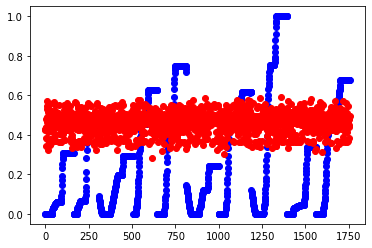

In [ ]:
x1 = []
x1_pred = []
x2 = []
x2_pred = []
x3 = []
x3_pred = []
x4 = []
x4_pred = []
x5 = []
x5_pred = []
x6 = []
x6_pred = []
x7 = []
x7_pred = []
x8 = []
x8_pred = []
x9= []
x9_pred = []
x10 = []
x10_pred = []
x11 = []
x11_pred = []
x12 = []
x12_pred = []


train_loaders = []
for i in range(0,len(datasets)):
  CSV = datasets[i][0]
  depth = datasets[i][1]
  image = datasets[i][2]
  dataset = DatasetItar(CSV,depth,image)
  train_loader = DataLoader(dataset,shuffle=False,batch_size=1)
  train_loaders.append(train_loader) 

for j in range(0,len(train_loaders)):
  train_loader = train_loaders[j]
  for data in (train_loader):
    x = data[0][:,:,:].to(device)
    x_next = data[1][:,:,:].to(device)
    image_current = data[2].to(device)
    image_next = data[3].to(device)
    depth_current = data[4].to(device)
    depth_next = data[5].to(device)
    train_input = x
    train_target = x_next
    out = model(train_input,image_current,depth_current)
    x1.append(torch.flatten(x[:,:,0]).tolist())
    x2.append(torch.flatten(x[:,:,1]).tolist())
    x3.append(torch.flatten(x[:,:,2]).tolist())
    x4.append(torch.flatten(x[:,:,3]).tolist())
    x5.append(torch.flatten(x[:,:,4]).tolist())
    x6.append(torch.flatten(x[:,:,5]).tolist())
    x7.append(torch.flatten(x[:,:,6]).tolist())
    x8.append(torch.flatten(x[:,:,7]).tolist())
    x9.append(torch.flatten(x[:,:,8]).tolist())
    x10.append(torch.flatten(x[:,:,9]).tolist())
    x11.append(torch.flatten(x[:,:,10]).tolist())
    x12.append(torch.flatten(x[:,:,11]).tolist())
    x1_pred.append(out[:,0].tolist())
    x2_pred.append(out[:,1].tolist())
    x3_pred.append(out[:,2].tolist())
    x4_pred.append(out[:,3].tolist())
    x5_pred.append(out[:,4].tolist())
    x6_pred.append(out[:,5].tolist())
    x7_pred.append(out[:,6].tolist())
    x8_pred.append(out[:,7].tolist())
    x9_pred.append(out[:,8].tolist())
    x10_pred.append(out[:,9].tolist())
    x11_pred.append(out[:,10].tolist())
    x12_pred.append(out[:,11].tolist())
                
                


    

x1 = np.array(x1)
x2 = np.array(x2)
x3 = np.array(x3)
x4 = np.array(x4)
x5 = np.array(x5)
x6 = np.array(x6)
x7 = np.array(x7)
x8 = np.array(x8)
x9 = np.array(x9)
x10 = np.array(x10)
x11 = np.array(x11)
x12 = np.array(x12)

x1_pred = np.array(x1_pred)
x2_pred = np.array(x2_pred)
x3_pred = np.array(x3_pred)
x4_pred = np.array(x4_pred)
x5_pred = np.array(x5_pred)
x6_pred = np.array(x6_pred)
x7_pred = np.array(x7_pred)
x8_pred = np.array(x8_pred)
x9_pred = np.array(x9_pred)
x10_pred = np.array(x10_pred)
x11_pred = np.array(x11_pred)
x12_pred = np.array(x12_pred)


t1 = np.arange(0.0, x1_pred.shape[0], 1) 
plt.figure()
plt.plot(t1, x1, 'bo')
plt.plot( t1, x1_pred, 'or')
plt.savefig('outputs/x1axis.png')

t2 = np.arange(0.0, x2_pred.shape[0], 1) 
plt.figure()
plt.plot(t2, x2, 'bo')   
plt.plot( t2, x2_pred, 'or')
plt.savefig('outputs/x2axis.png')

t3 = np.arange(0.0, x3_pred.shape[0], 1) 
plt.figure()
plt.plot(t3, x3, 'bo')
plt.plot( t3, x3_pred, 'or')
plt.savefig('outputs/x1axis.png')


t4 = np.arange(0.0, x4_pred.shape[0], 1) 
plt.figure()
plt.plot(t4, x4, 'bo')
plt.plot( t4, x4_pred, 'or')
plt.savefig('outputs/x4axis.png')

t5 = np.arange(0.0, x5_pred.shape[0], 1) 
plt.figure()
plt.plot(t5, x5, 'bo')
plt.plot( t5, x5_pred, 'or')
plt.savefig('outputs/x5axis.png')

t6 = np.arange(0.0, x6_pred.shape[0], 1) 
plt.figure()
plt.plot(t6, x6, 'bo')
plt.plot( t6, x6_pred, 'or')
plt.savefig('outputs/x6axis.png')

t7 = np.arange(0.0, x7_pred.shape[0], 1) 
plt.figure()
plt.plot(t7, x7, 'bo')
plt.plot( t7, x7_pred, 'or')
plt.savefig('outputs/x7axis.png')   

t8 = np.arange(0.0, x8_pred.shape[0], 1) 
plt.figure()
plt.plot(t8, x8, 'bo')
plt.plot( t8, x8_pred, 'or')
plt.savefig('outputs/x8axis.png') 

t9 = np.arange(0.0, x9_pred.shape[0], 1) 
plt.figure()
plt.plot(t9, x9, 'bo')
plt.plot( t9, x9_pred, 'or')
plt.savefig('outputs/x9axis.png') 


t10 = np.arange(0.0, x10_pred.shape[0], 1) 
plt.figure()
plt.plot(t10, x10, 'bo')
plt.plot( t10, x10_pred, 'or')
plt.savefig('outputs/x10axis.png') 

t11 = np.arange(0.0, x11_pred.shape[0], 1) 
plt.figure()
plt.plot(t11, x11, 'bo')
plt.plot( t11, x11_pred, 'or')
plt.savefig('outputs/x11axis.png') 

t12 = np.arange(0.0, x12_pred.shape[0], 1) 
plt.figure()
plt.plot(t12, x12, 'bo')
plt.plot( t12, x12_pred, 'or')
plt.savefig('outputs/x12axis.png')

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/datasets/transformers1.pth')